In [5]:
import itertools
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

In [6]:
plt.style.use(hep.style.ROOT)

In [7]:
# Run code which will save the center slice in the horizontal direction of the
# the rod
# Expected execution time is about about 2 minutes, writing to disk is bulk
# of the time here

!nvidia-smi
!nvcc  -o radicals -x cu -lnvToolsExt -I CLI11/include solverRadicals.cu
!./radicals -h

Sun Jul 16 08:49:59 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-12GB            Off| 00000000:65:00.0 Off |                    0 |
| N/A   44C    P0               28W / 250W|      0MiB / 12288MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
%%time
!./radicals -l

Parameter                 Value
----------------------------------------
Diffusion coefficient     0.01
Radical formation rate    0.5
Radical crosslinking rate 0.001
Radical oxidation rate    1.5
Dose rate                 1
Irradiation time          10000
Number of time steps      20000
Dimensions                (100, 100, 500)
Total number of steps     5000000
Number of slices          1000000000
Limited save              1
Output file name prefix   output
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
0.549973 ms per step
CPU times: user 730 ms, sys: 213 ms, total: 943 ms
Wall time: 33.2 s


In [11]:
activity = np.fromfile("outputactivity.dat", dtype=np.float32)
tDim = 20000
xDim = 100
activity = np.reshape(activity, (tDim, xDim))

In [16]:
activity.shape

(20000, 500, 100)

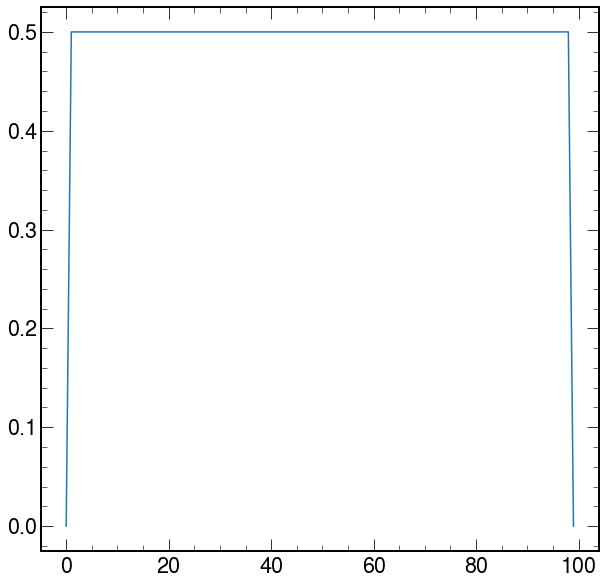

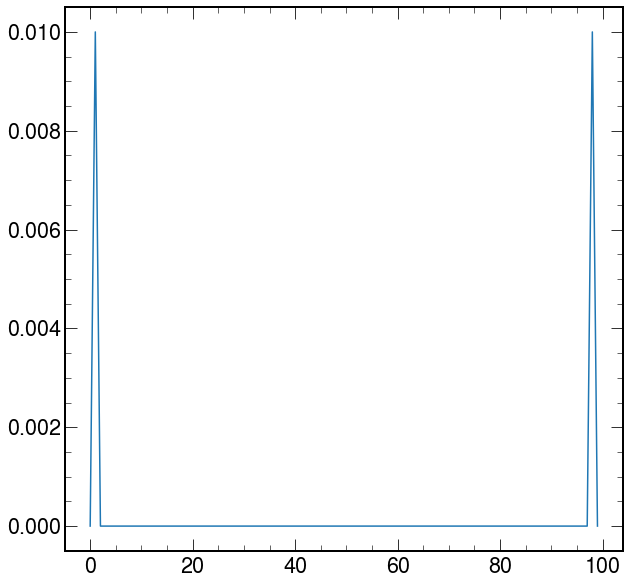

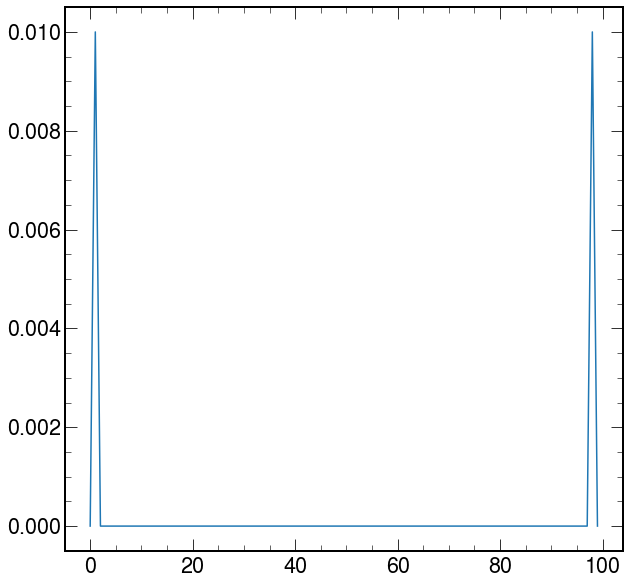

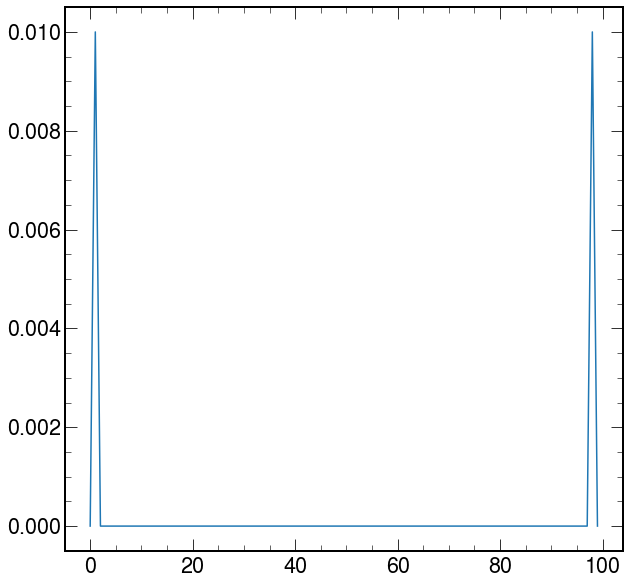

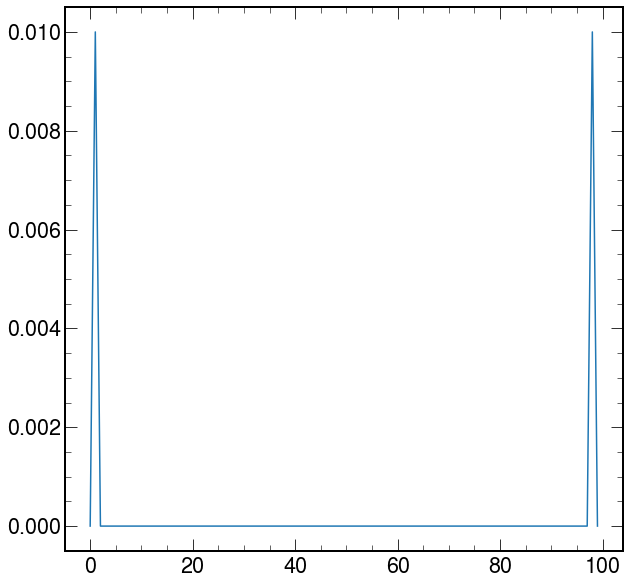

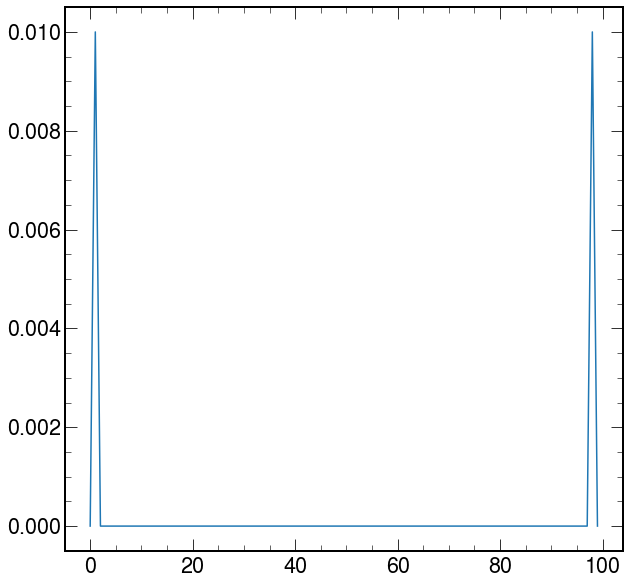

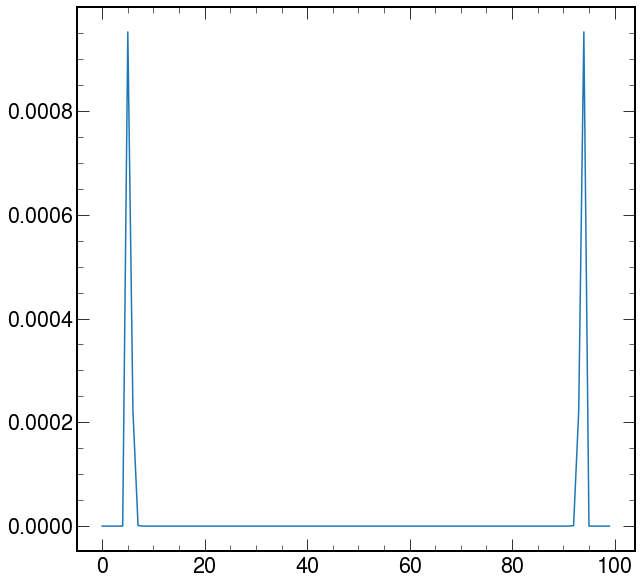

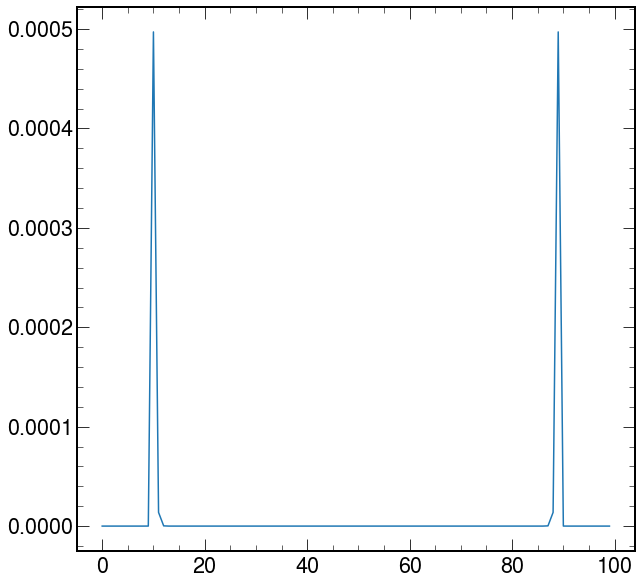

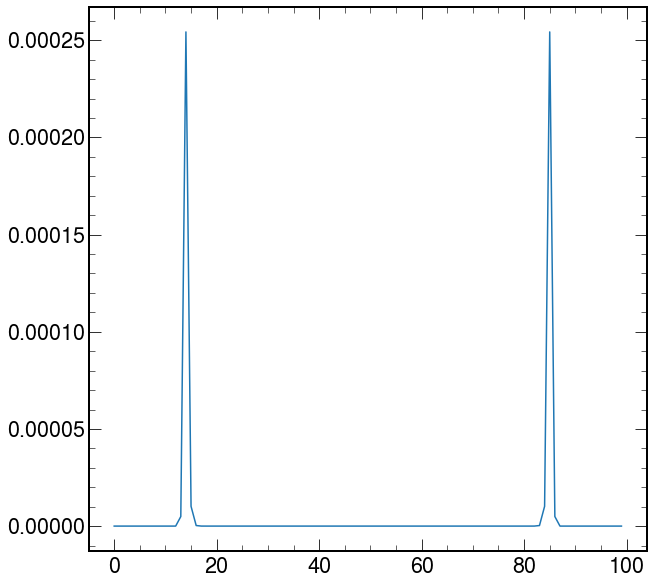

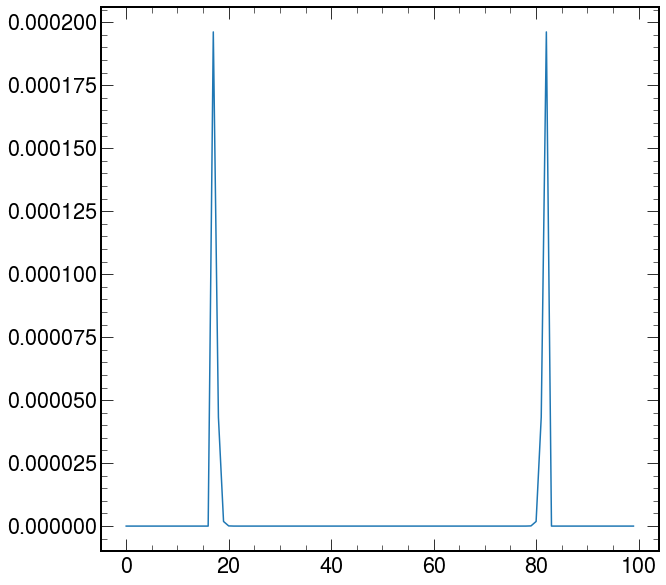

In [31]:
for i in range(0, 20000, 2000):
    plt.figure()
    plt.plot(activity[i, 250])

In [80]:
D = 0.1
R_arr = [0.0003, 0.00045, 0.0006]
k1_arr = [0.01, 0.02, 0.03]
k2_arr = [0.05, 0.1, 0.2]
for R, k1, k2 in itertools.product(R_arr, k1_arr, k2_arr):
    print(f"Processing D={D} R={R} k1={k1} k2={k2}")
    process = subprocess.run(
        [
            "./radicals",
            "--diffCoeff",
            str(D),
            "--radFormRate",
            str(R),
            "--k1",
            str(k1),
            "--k2",
            str(k2),
        ],
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        universal_newlines=True,
    )
    activity = np.fromfile("outputactivity.dat", dtype=np.float32)
    tDim = 20000
    xDim = 100
    yDim = 500
    activity = np.reshape(activity, (tDim, yDim, xDim))
    maximum = []
    times = range(10001, 20000)
    for time in times:
        maximum.append(np.argmax(activity[time, 250, :]))
    times = np.array(times)
    times = times - times[0]
    maximum = np.array(maximum)
    maximum = maximum / 10
    np.save(f"test_D_{D}_R_{R}_k1_{k1}_k2_{k2}".replace(".", "p"), maximum)

Processing D=0.1 R=0.0003 k1=0.01 k2=0.05
Processing D=0.1 R=0.0003 k1=0.01 k2=0.1
Processing D=0.1 R=0.0003 k1=0.01 k2=0.2
Processing D=0.1 R=0.0003 k1=0.02 k2=0.05
Processing D=0.1 R=0.0003 k1=0.02 k2=0.1
Processing D=0.1 R=0.0003 k1=0.02 k2=0.2
Processing D=0.1 R=0.0003 k1=0.03 k2=0.05
Processing D=0.1 R=0.0003 k1=0.03 k2=0.1
Processing D=0.1 R=0.0003 k1=0.03 k2=0.2
Processing D=0.1 R=0.00045 k1=0.01 k2=0.05
Processing D=0.1 R=0.00045 k1=0.01 k2=0.1
Processing D=0.1 R=0.00045 k1=0.01 k2=0.2
Processing D=0.1 R=0.00045 k1=0.02 k2=0.05
Processing D=0.1 R=0.00045 k1=0.02 k2=0.1
Processing D=0.1 R=0.00045 k1=0.02 k2=0.2
Processing D=0.1 R=0.00045 k1=0.03 k2=0.05
Processing D=0.1 R=0.00045 k1=0.03 k2=0.1
Processing D=0.1 R=0.00045 k1=0.03 k2=0.2
Processing D=0.1 R=0.0006 k1=0.01 k2=0.05
Processing D=0.1 R=0.0006 k1=0.01 k2=0.1
Processing D=0.1 R=0.0006 k1=0.01 k2=0.2
Processing D=0.1 R=0.0006 k1=0.02 k2=0.05
Processing D=0.1 R=0.0006 k1=0.02 k2=0.1
Processing D=0.1 R=0.0006 k1=0.02 k2=0.2

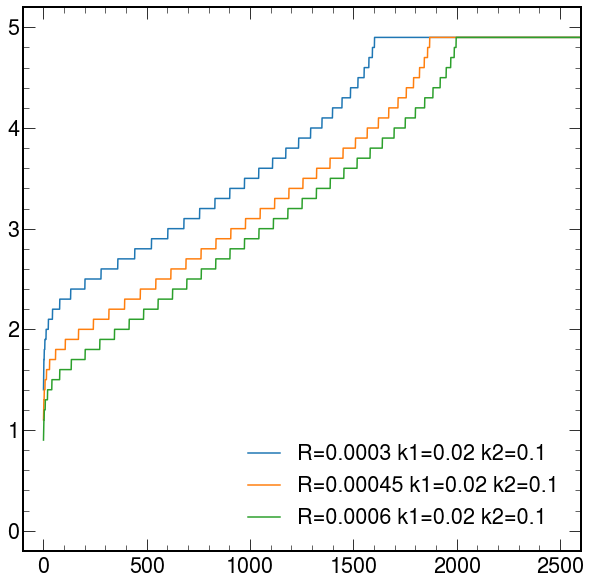

In [4]:
D = 0.1
R_arr = [0.0003, 0.00045, 0.0006]
# R_arr = [0.00045]
# k1_arr = [0.01, 0.02, 0.03]
k1_arr = [0.02]
# k2_arr = [0.05, 0.1, 0.2]
k2_arr = [0.1]
for R, k1, k2 in itertools.product(R_arr, k1_arr, k2_arr):
    filename = f"D_{D}_R_{R}_k1_{k1}_k2_{k2}".replace(".", "p")
    label = f"R={R} k1={k1} k2={k2}"
    array = np.load(f"test_{filename}.npy")
    plt.plot(array, label=label)
plt.xlim(-100, 2600)
plt.ylim(-0.2, 5.2)
plt.legend()

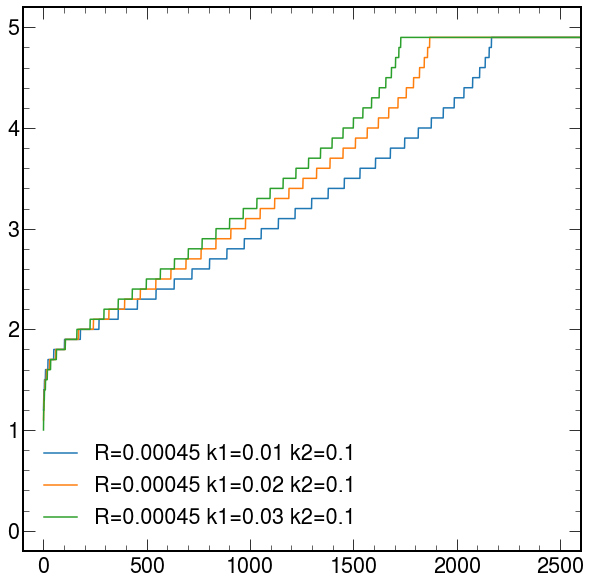

In [90]:
D = 0.1
# R_arr = [0.0003, 0.00045, 0.0006]
R_arr = [0.00045]
k1_arr = [0.01, 0.02, 0.03]
# k1_arr = [0.02]
# k2_arr = [0.05, 0.1, 0.2]
k2_arr = [0.1]
for R, k1, k2 in itertools.product(R_arr, k1_arr, k2_arr):
    filename = f"D_{D}_R_{R}_k1_{k1}_k2_{k2}".replace(".", "p")
    label = f"R={R} k1={k1} k2={k2}"
    array = np.load(f"test_{filename}.npy")
    plt.plot(array, label=label)
plt.xlim(-100, 2600)
plt.ylim(-0.2, 5.2)
plt.legend()

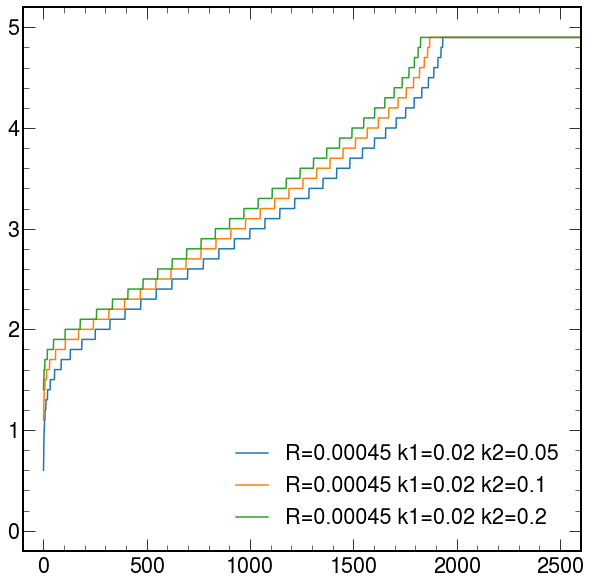

In [91]:
D = 0.1
# R_arr = [0.0003, 0.00045, 0.0006]
R_arr = [0.00045]
# k1_arr = [0.01, 0.02, 0.03]
k1_arr = [0.02]
k2_arr = [0.05, 0.1, 0.2]
# k2_arr = [0.1]
for R, k1, k2 in itertools.product(R_arr, k1_arr, k2_arr):
    filename = f"D_{D}_R_{R}_k1_{k1}_k2_{k2}".replace(".", "p")
    label = f"R={R} k1={k1} k2={k2}"
    array = np.load(f"test_{filename}.npy")
    plt.plot(array, label=label)
plt.xlim(-100, 2600)
plt.ylim(-0.2, 5.2)
plt.legend()

In [ ]:
## Okayish set of parameters
#!./radicals \
#    --diffCoeff 0.1 \
#    --radFormRate 0.00045 \
#    --k1 0.02 \
#    --k2 0.1
#!ls

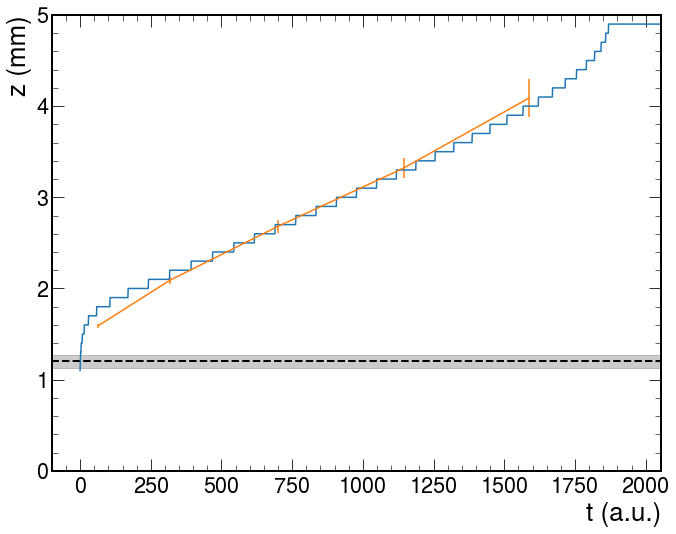

In [52]:
maximum = []
times = range(10001, 13500, 1)
for time in times:
    maximum.append(np.argmax(activity[time, 250, :]))

times = np.array(times)
times = times - times[0]
maximum = np.array(maximum)
maximum = maximum / 10

# find the saturation point
t_saturation = times[np.argmax(maximum)]

data_t = np.array([1, 5, 11, 18, 25])
data_et = np.ones_like(data_t) * 0.5
data_z = np.array([1.59, 2.09, 2.68, 3.32, 4.09])
data_ez = np.array([0.02, 0.04, 0.07, 0.11, 0.21])

z_index = np.array([1.23, 1.23, 1.24, 1.16, 1.14])
z_index_mean = np.mean(z_index)
z_index_std = np.sqrt((np.std(z_index)) ** 2 + (0.05 * z_index_mean) ** 2)

# Days to a.u.
data_t = data_t * (t_saturation * 0.85 / data_t[-1])

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(times, maximum)
ax.errorbar(data_t, data_z, xerr=data_et, yerr=data_ez)
ax.hlines(
    z_index_mean,
    -1000,
    10000,
    color="black",
    linestyles="dashed",
    label="index boundary",
    linewidth=2,
)
ax.fill_between(
    np.linspace(-1000, 10000, 100),
    z_index_mean - z_index_std,
    z_index_mean + z_index_std,
    alpha=0.2,
    color="black",
)
ax.set_xlim(-100, t_saturation * 1.1)
ax.set_ylim(0, 5)
ax.set_xlabel("t (a.u.)")
ax.set_ylabel("z (mm)")
fig.tight_layout()
plt.show()

In [2]:
!ls -lht

total 3.8G
-rw-r--r-- 1 chpapage us_cms  11K Jul 24 07:38 RunGPUSimulation_visualization.ipynb
-rw-r--r-- 1 chpapage us_cms 7.7M Jul 24 07:29 outputactivity.dat
-rwxr-xr-x 1 chpapage us_cms 1.6M Jul 24 07:28 radicals
-rw-r--r-- 1 chpapage us_cms  45K Jul 24 07:25 RunGPUSimulation_annealing.ipynb
-rw-r--r-- 1 chpapage us_cms 114K Jul 24 07:25 RunGPUSimulation_scan.ipynb
-rw-r--r-- 1 chpapage us_cms 329K Jul 24 06:55 sandiaOxygenModel.ipynb
-rw-r--r-- 1 chpapage us_cms 397K Jul 24 06:55 jaeriOxygenModel.ipynb
-rw-r--r-- 1 chpapage us_cms 185K Jul 24 06:55 jaeriCase1.ipynb
-rw-r--r-- 1 chpapage us_cms  79K Jul 17 09:08 test_D_0p1_R_0p0006_k1_0p02_k2_0p2.npy
-rw-r--r-- 1 chpapage us_cms 3.8G Jul 17 07:27 outputoxygen.dat
-rw-r--r-- 1 chpapage us_cms  93K Jul 17 06:39 rod_photography_comparison.ipynb
-rw-r--r-- 1 chpapage us_cms  39K Jul 17 06:39 oxygen_penetration_model.ipynb
-rw-r--r-- 1 chpapage us_cms  15K Jul 17 06:39 opencv_tests.ipynb
-rw-r--r-- 1 chpapage us_cms 876K Jul 17 06:39 li

1


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


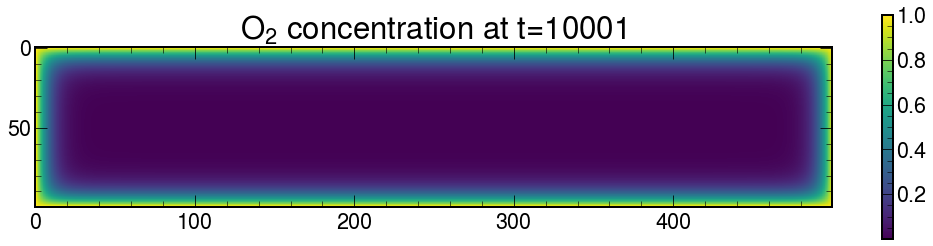

0.8878142


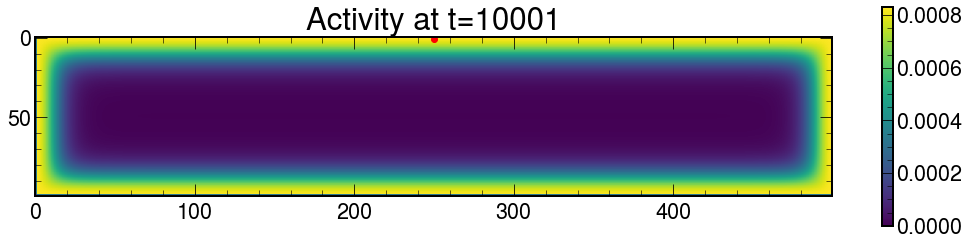

27


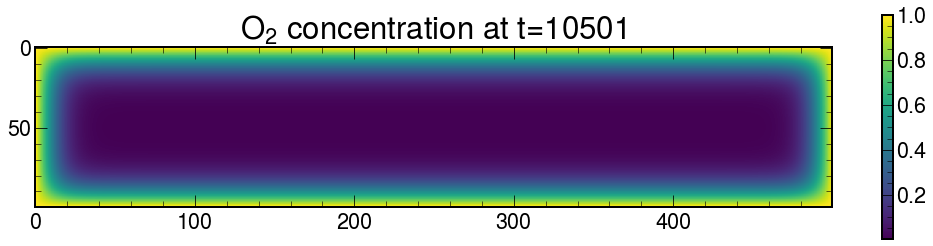

0.048933413


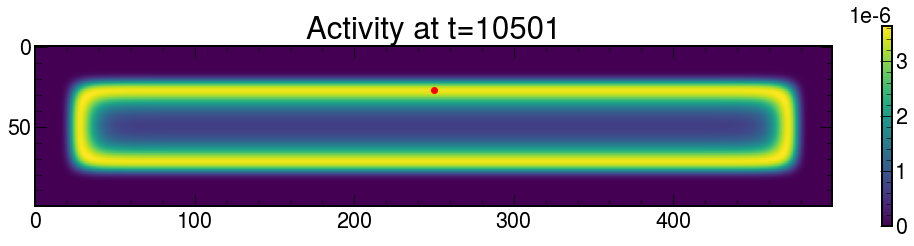

39


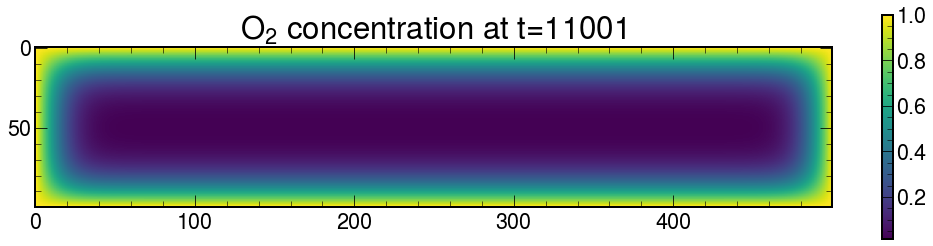

0.02998697


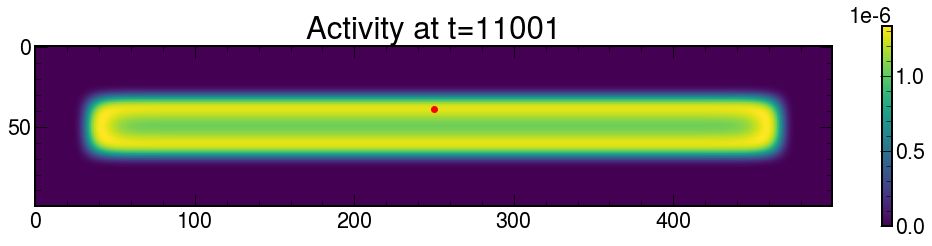

49


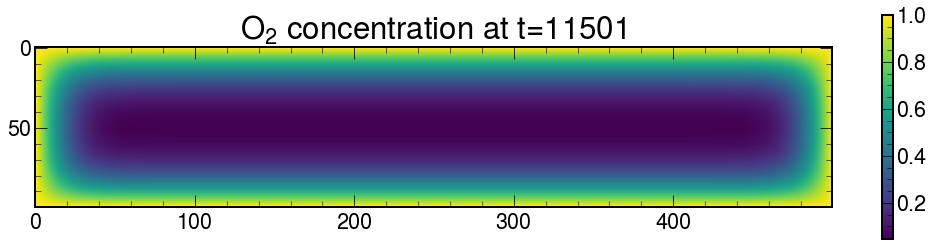

0.04735807


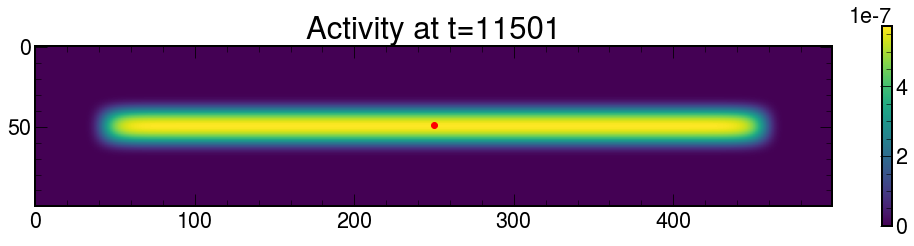

49


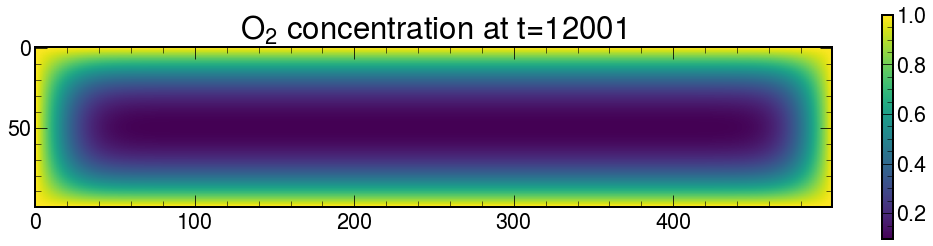

0.096309654


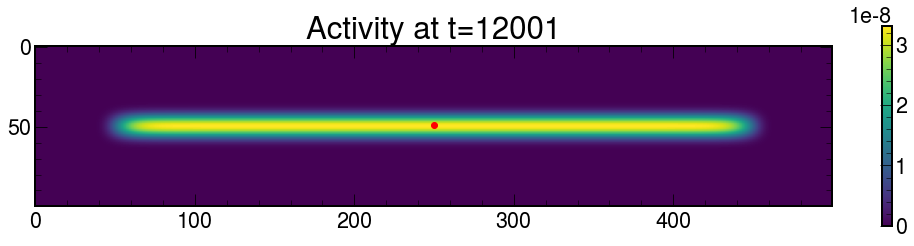

49


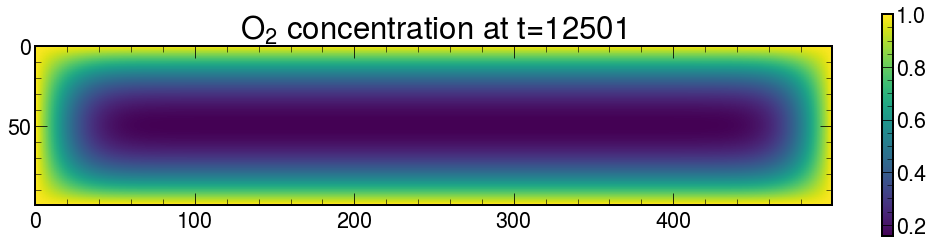

0.15582147


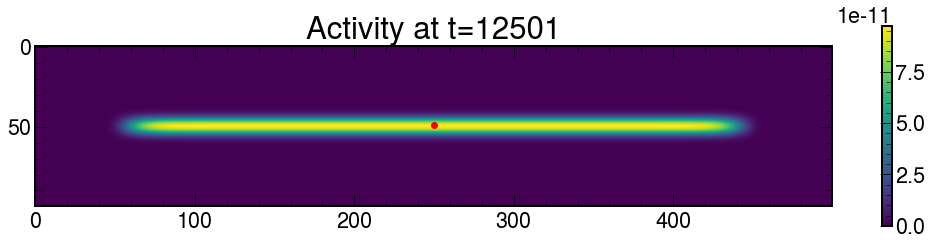

In [25]:
activity = np.fromfile("outputactivity.dat", dtype=np.float32)
tDim = 20000
xDim = 100
yDim = 500
activity = np.reshape(activity, (tDim, yDim, xDim))

data = np.fromfile("outputoxygen.dat", dtype=np.float32)
tDim = 20000
xDim = 100
yDim = 500
data = np.reshape(data, (tDim, yDim, xDim))

for time in range(10001, 13001, 500):
    # maximum = np.unravel_index(np.argmax(activity[time, 250, :]), activity.shape)
    maximum = np.argmax(activity[time, 250, :])
    print(maximum)

    fig, ax = plt.subplots(figsize=(15, 4))
    im = ax.imshow(data[time, :, :].T)
    fig.colorbar(im, ax=ax)
    ax.set_title(f"$O_2$ concentration at t={time}")
    fig.tight_layout()
    plt.show()

    print(data[time][250][maximum])

    fig, ax = plt.subplots(figsize=(15, 4))
    im = ax.imshow(activity[time, :, :].T)
    fig.colorbar(im, ax=ax)
    ax.set_title(f"Activity at t={time}")

    ax.plot(250, maximum, "o", color="r")
    fig.tight_layout()
    plt.show()

(20000, 500, 100)
(500, 100)


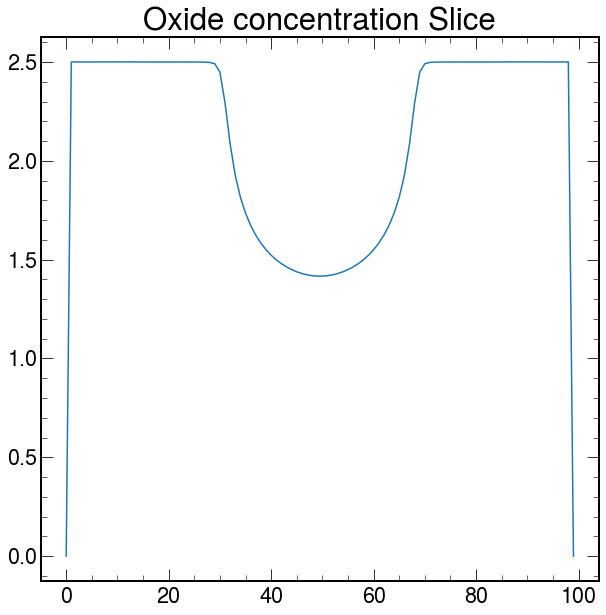

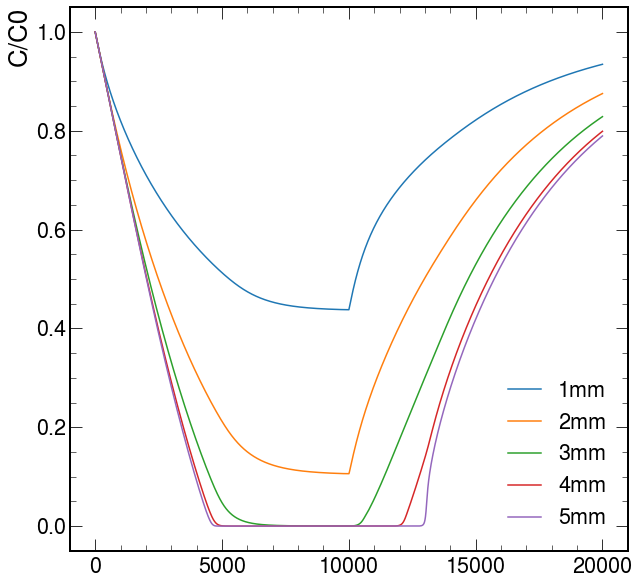

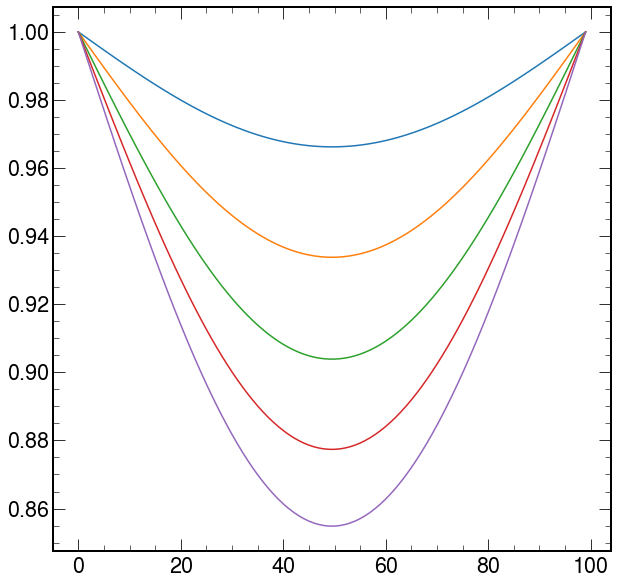

In [61]:
# activity = activity/np.amax(activity)
print(activity.shape)
oxideConcentration = np.sum(activity, axis=0)
print(oxideConcentration.shape)

plt.figure()
plt.plot(oxideConcentration[50, :])
plt.title("Oxide concentration Slice")
plt.show()

plt.figure()
plt.plot(data[:, 250, 10], label="1mm")
plt.plot(data[:, 250, 20], label="2mm")
plt.plot(data[:, 250, 30], label="3mm")
plt.plot(data[:, 250, 40], label="4mm")
plt.plot(data[:, 250, 50], label="5mm")
plt.ylabel("C/C0")
plt.legend()
plt.show()

plt.figure()
plt.plot(data[-1, 10, :])
plt.plot(data[-1, 20, :])
plt.plot(data[-1, 30, :])
plt.plot(data[-1, 40, :])
plt.plot(data[-1, 50, :])
plt.show()

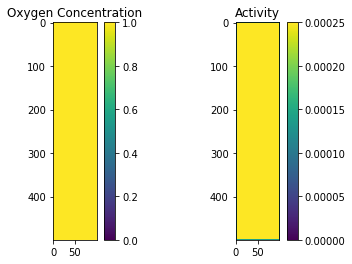

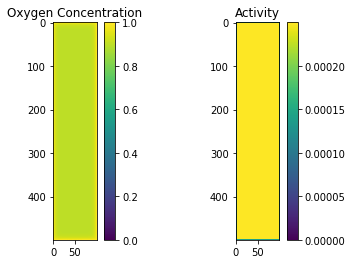

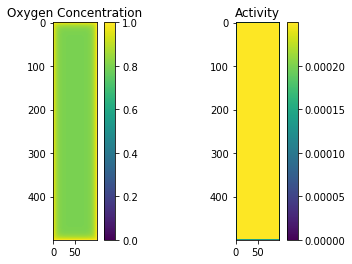

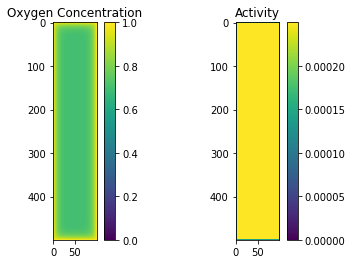

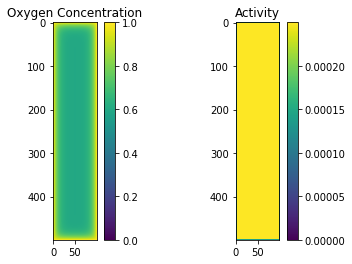

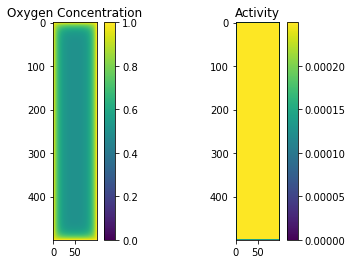

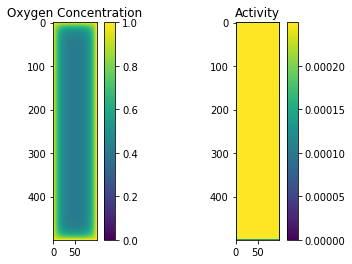

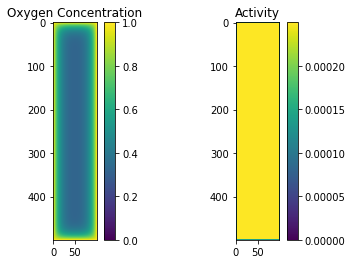

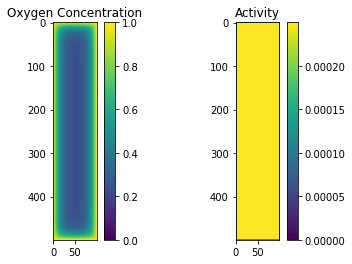

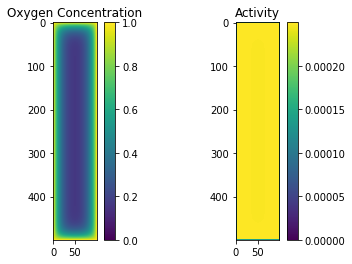

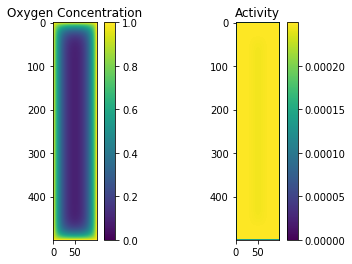

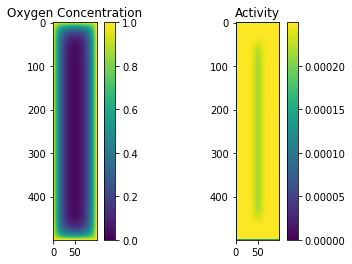

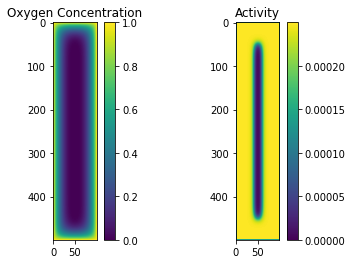

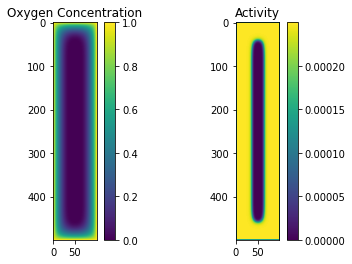

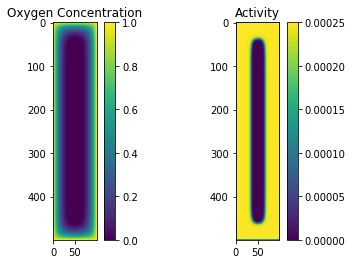

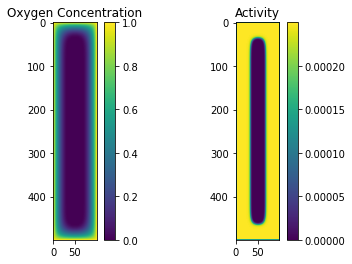

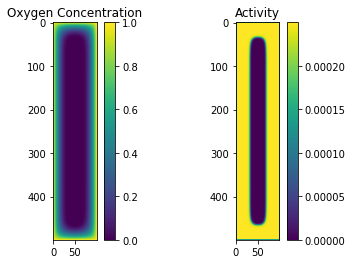

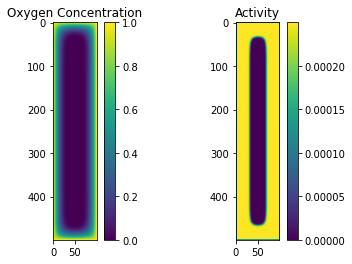

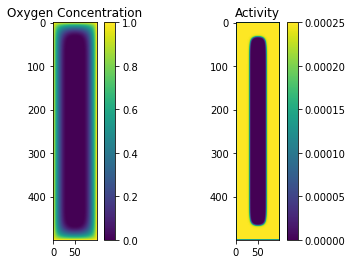

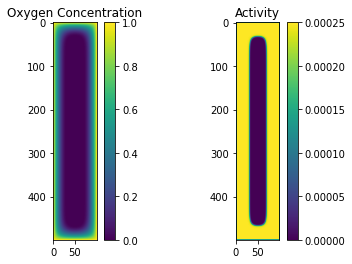

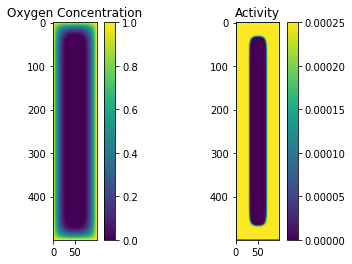

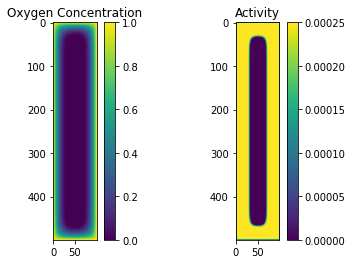

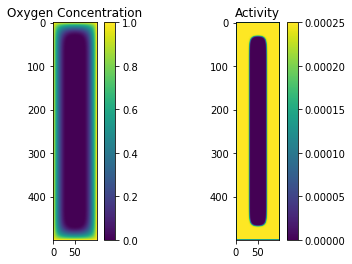

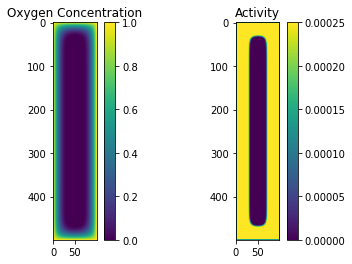

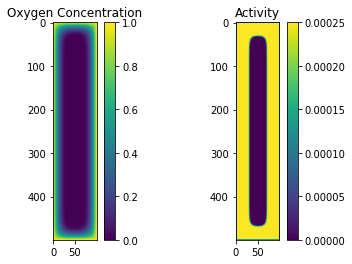

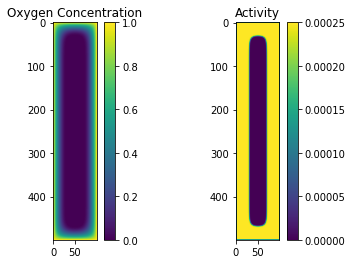

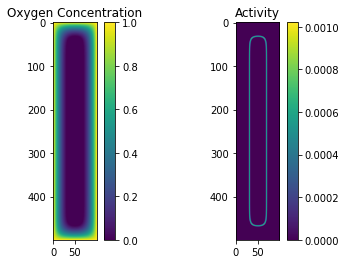

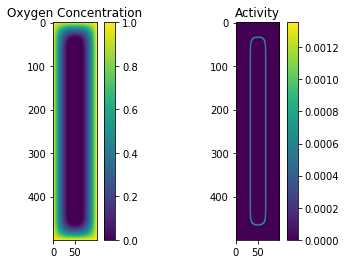

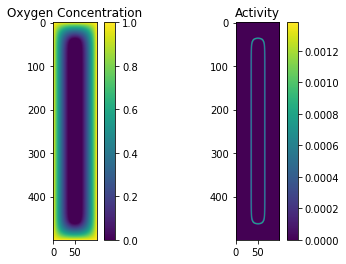

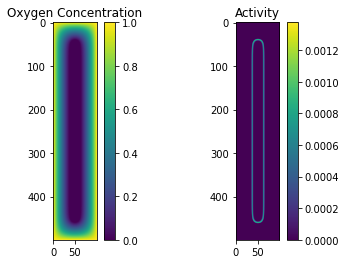

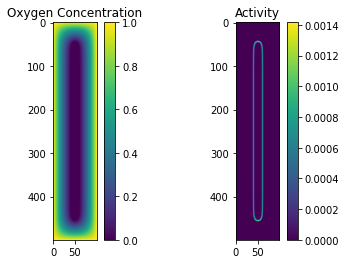

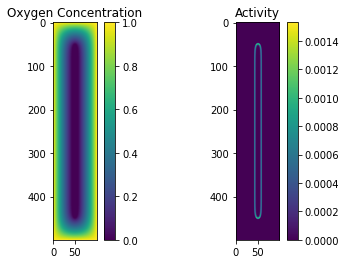

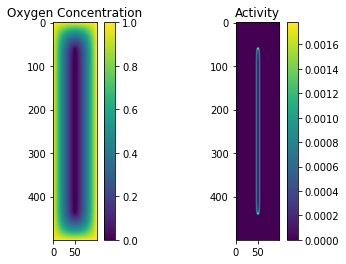

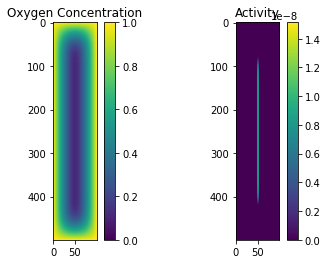

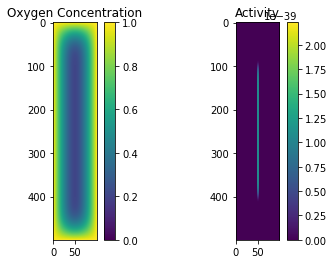

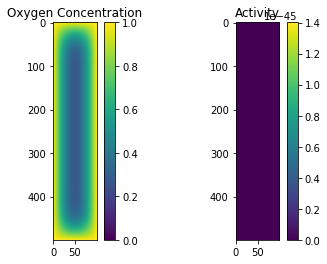

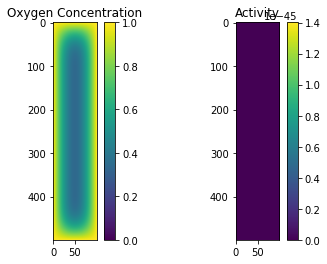

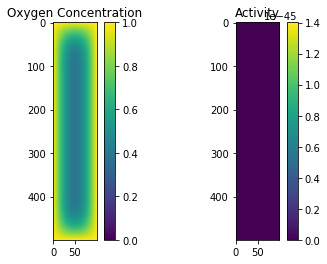

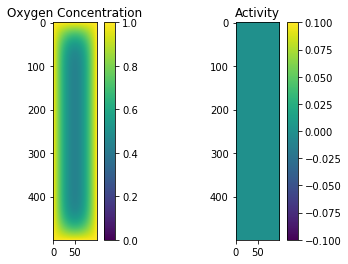

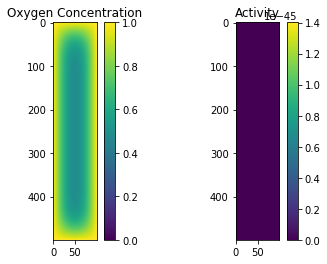

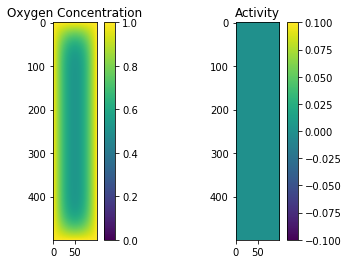

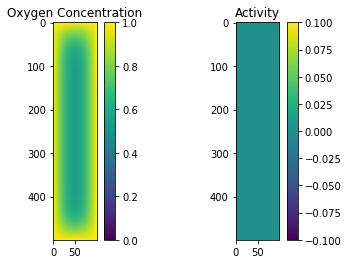

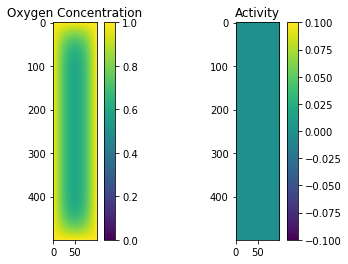

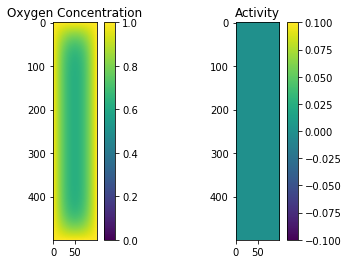

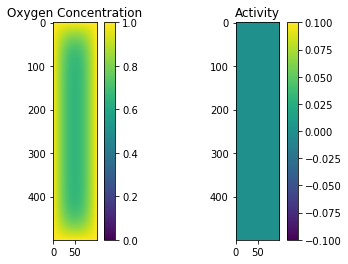

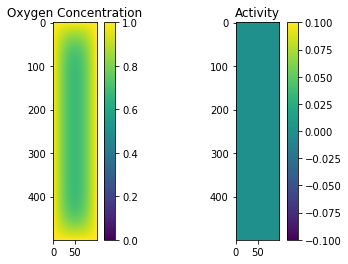

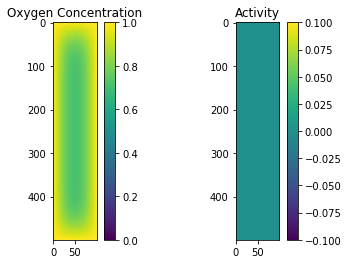

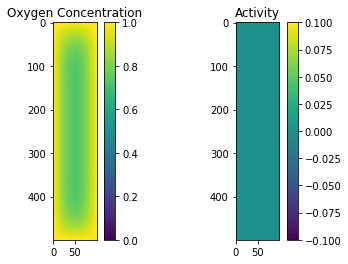

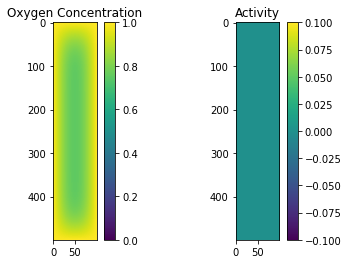

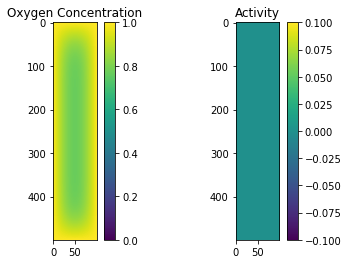

In [9]:
for x in range(50):
    plt.subplot(1, 2, 1)
    plt.imshow(data[x * tDim // 50, :, :], vmin=0, vmax=1)
    plt.colorbar()
    plt.title("Oxygen Concentration")

    plt.subplot(1, 2, 2)
    plt.imshow(activity[x * tDim // 50, :, :], vmin=0)
    plt.colorbar()
    plt.title("Activity")
    plt.show()